## Data sprint 71 : Microbes Classification Dphi
### Eng: Dawood AL-Waqedi

## Objective

### My Task is to Build a Machine Learning model that classifiction  a microbe belongs to.

# About the dataset
Microbes are tiny living things that are found all around us and are too small to be seen by the naked eye. They live in water, soil, and in the air. The human body is home to millions of these microbes too, also called microorganisms.
Microbes come in a huge variety of shapes - everything from rods to spheres, even corkscrew shapes. They’re all about the same size, with some a little bigger than others and smaller than others. They don’t have much of a color unless we apply a stain to them, which we sometimes do to see them under the microscope.
Microbes can be useful as well as harmful. Certain microbes cause severe infections and diseases and can also spoil food and other materials. While others play an important role in maintaining environmental balance.

 

# Data Description:
Data Description 
1.Solidity: It is the ratio of area of an object to the area of a convex hull of the object. Computed as Area/ConvexArea.
2.Eccentricity: The eccentricity is the ratio of length of major to minor axis of an object.
3.EquivDiameter: Diameter of a circle with the same area as the region.
4.Extrema: Extrema points in the region. The format of the vector is [top-left top-right right-top right-bottom bottom-right bottom-left left-bottom left-top].
5.Filled Area: Number of pixels in FilledImage, returned as a scalar.
6.Extent: Ratio of the pixel area of a region with respect to the bounding box area of an object.  
7.Orientation: The overall direction of the shape. The value ranges from -90 degrees to 90 degrees.
8.Euler number: Number of objects in the region minus the number of holes in those objects.
9.Bounding box: Position and size of the smallest box (rectangle) which bounds the object.
10.Convex hull: Smallest convex shape/polygon that contains the object.
11.Major axis: The major axis is the endpoints of the longest line that can be drawn through the object. Length (in pixels) of the major axis is the largest dimension of the object.
12.Minor axis: The axis perpendicular to the major axis is called the minor axis. Length (in pixels) of the minor axis is the smallest line connecting a pair of points on the contour.
13.Perimeter: Number of pixels around the border of the region.
14.Centroid: Centre of mass of the region. It is a measure of object’s location in the image.
15.Area: Total number of pixels in a region/shape.

# Loading Libraries

In [335]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Loading the data
We would use the pandas module to read the files. using the "read_csv" function. the files format is.csv (similar to .xls)

In the round brackets we have the path to where the data is saves i.e on Github

In [336]:
mic_data= pd.read_csv('e:train_dataset.csv')    
test_data=pd.read_csv('e:test_dataset.csv')

##### Let's check how our data looks. This can be done using head() method.

In [337]:
mic_data.head()

,Serial No,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,13126,10.30,22.5,2.000,6.95,0.0726,5.00,2.15,22.9,6.98,...,6.98,0.841,0.273,0.325,0.02840,7.06,5.42,0.1840,1.930,Penicillum
1,12936,7.41,20.3,1.010,20.60,0.0207,4.57,13.00,22.9,20.40,...,20.40,0.389,0.295,0.163,0.01060,20.50,9.92,0.0495,1.280,Penicillum
2,28006,12.60,19.5,3.810,9.84,0.2990,6.67,6.08,22.6,9.81,...,9.82,1.040,0.914,0.305,0.08240,10.50,4.46,0.6490,5.350,Ulothrix
3,24884,5.81,21.9,3.090,4.79,0.1940,3.34,8.67,22.5,4.54,...,5.60,1.410,0.696,0.742,0.11700,5.50,13.50,0.4310,3.970,Ulothrix
4,10680,7.51,17.3,0.751,15.40,0.0110,5.36,22.30,23.0,15.50,...,15.50,0.253,0.272,0.100,0.00609,15.40,16.80,0.0287,0.678,Raizopus


In [338]:
mic_data.shape

(21368, 26)

Le's explore the attributes / columns of the dataset

In [339]:
mic_data.columns

Index(['Serial No', 'Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema',
       'FilledArea', 'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1',
       'BoundingBox2', 'BoundingBox3', 'BoundingBox4', 'ConvexHull1',
       'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'MajorAxisLength',
       'MinorAxisLength', 'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2',
       'Area', 'raddi', 'microorganisms'],
      dtype='object')

# Target Variable:
The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding. It is the variable that is, or should be the output.

In [340]:
mic_data.microorganisms.value_counts()

Ulothrix          5194
Volvox            3024
Protozoa          2721
Aspergillus sp    2721
Yeast             2520
Raizopus          1786
Diatom            1273
Pithophora         945
Penicillum         756
Spirogyra          428
Name: microorganisms, dtype: int64

# Input Variables:

In [341]:
input_var=mic_data.columns.drop('microorganisms')
input_var

Index(['Serial No', 'Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema',
       'FilledArea', 'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1',
       'BoundingBox2', 'BoundingBox3', 'BoundingBox4', 'ConvexHull1',
       'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'MajorAxisLength',
       'MinorAxisLength', 'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2',
       'Area', 'raddi'],
      dtype='object')

# Variables/Features:
['Serial No', 'Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema',
       'FilledArea', 'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1',
       'BoundingBox2', 'BoundingBox3', 'BoundingBox4', 'ConvexHull1',
       'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'MajorAxisLength',
       'MinorAxisLength', 'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2',
       'Area', 'raddi'],
      dtype='object').

In [342]:
x = mic_data.drop(['microorganisms'], axis = 1)
y = mic_data['microorganisms']

# Exploratory Data Analysis (EDA)
understanding the data. This step always helps in improving our model.

In [343]:
mic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21368 entries, 0 to 21367
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Serial No        21368 non-null  int64  
 1   Solidity         21368 non-null  float64
 2   Eccentricity     21368 non-null  float64
 3   EquivDiameter    21368 non-null  float64
 4   Extrema          21368 non-null  float64
 5   FilledArea       21368 non-null  float64
 6   Extent           21368 non-null  float64
 7   Orientation      21368 non-null  float64
 8   EulerNumber      21368 non-null  float64
 9   BoundingBox1     21368 non-null  float64
 10  BoundingBox2     21368 non-null  float64
 11  BoundingBox3     21368 non-null  float64
 12  BoundingBox4     21368 non-null  float64
 13  ConvexHull1      21368 non-null  float64
 14  ConvexHull2      21368 non-null  float64
 15  ConvexHull3      21368 non-null  float64
 16  ConvexHull4      21368 non-null  float64
 17  MajorAxisLen

In [344]:
mic_data['microorganisms'].value_counts()

Ulothrix          5194
Volvox            3024
Protozoa          2721
Aspergillus sp    2721
Yeast             2520
Raizopus          1786
Diatom            1273
Pithophora         945
Penicillum         756
Spirogyra          428
Name: microorganisms, dtype: int64

### Undrstaning  count of rows in all columns it Null Data in Dataset :

In [345]:
mic_data.isnull().sum()

Serial No          0
Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
raddi              0
microorganisms     0
dtype: int64

In [346]:
mic_data.duplicated().sum()

0

In [347]:
mic_data.describe()

,Serial No,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,...,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000
mean,15257.325908,9.700074,19.489904,3.637855,11.829647,0.420587,5.846141,11.777357,22.379627,10.877837,...,11.005289,10.980848,1.605573,1.013201,0.829936,0.255499,11.712323,11.597781,0.804587,5.220293
std,8808.215772,4.058715,3.463016,2.212756,6.045689,0.873546,3.256171,6.571021,0.941583,6.093468,...,6.088829,6.090648,1.673051,1.242217,1.143075,0.996407,6.031121,5.711966,1.170108,2.802506
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7619.500000,6.590000,17.400000,2.170000,6.720000,0.093675,3.300000,6.080000,22.200000,5.660000,...,5.730000,5.720000,0.635000,0.420000,0.252750,0.034700,6.560000,7.110000,0.215000,3.110000
50%,15247.500000,9.360000,20.700000,3.380000,12.000000,0.230000,5.260000,12.100000,22.600000,10.900000,...,11.000000,11.000000,1.170000,0.744000,0.519000,0.085900,12.000000,11.200000,0.514000,5.320000
75%,22905.250000,12.600000,22.200000,4.602500,17.100000,0.438000,7.850000,17.200000,22.900000,15.800000,...,15.900000,15.800000,2.070000,1.220000,0.967000,0.201000,16.900000,16.200000,0.943000,7.050000
max,30525.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000


In [348]:
mic_data.corr()

,Serial No,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
Serial No,1.000000,0.032826,-0.148613,-0.072845,-0.025592,-0.032378,0.067437,-0.002525,0.117797,-0.012615,...,-0.014557,-0.014029,-0.098907,-0.009825,-0.119573,-0.049463,-0.020825,0.003019,-0.085463,-0.023874
Solidity,0.032826,1.000000,-0.337917,-0.453368,0.070786,-0.274493,0.895904,-0.084554,0.364902,0.172553,...,0.161018,0.161411,-0.596087,-0.452719,-0.516105,-0.299742,0.071034,-0.018726,-0.352292,-0.488441
Eccentricity,-0.148613,-0.337917,1.000000,0.045777,-0.037511,-0.053135,-0.531226,0.066572,-0.019632,-0.075609,...,-0.070982,-0.070384,0.263745,-0.148972,0.073977,-0.003770,-0.045058,-0.006296,0.010560,0.109764
EquivDiameter,-0.072845,-0.453368,0.045777,1.000000,0.025950,0.750809,-0.369331,-0.006947,-0.834284,-0.111076,...,-0.096707,-0.099149,0.730263,0.692393,0.812157,0.455989,0.027857,-0.022724,0.910215,0.560953
Extrema,-0.025592,0.070786,-0.037511,0.025950,1.000000,0.018004,0.069626,0.021514,-0.057412,0.969169,...,0.970205,0.969660,-0.014181,-0.002280,0.005684,-0.008528,0.985530,0.011300,0.022212,-0.011155
FilledArea,-0.032378,-0.274493,-0.053135,0.750809,0.018004,1.000000,-0.200988,-0.003101,-0.736918,-0.093411,...,-0.082743,-0.081818,0.573197,0.593739,0.624122,0.439480,0.018389,-0.010895,0.867943,0.283573
Extent,0.067437,0.895904,-0.531226,-0.369331,0.069626,-0.200988,1.000000,-0.111361,0.286543,0.163557,...,0.151092,0.151992,-0.542320,-0.312354,-0.419491,-0.229768,0.073616,-0.030738,-0.274127,-0.424417
Orientation,-0.002525,-0.084554,0.066572,-0.006947,0.021514,-0.003101,-0.111361,1.000000,0.008932,-0.037090,...,-0.027427,-0.035953,0.015228,-0.002725,0.008935,-0.016305,-0.035935,-0.007520,-0.001253,-0.003211
EulerNumber,0.117797,0.364902,-0.019632,-0.834284,-0.057412,-0.736918,0.286543,0.008932,1.000000,0.050874,...,0.039704,0.039911,-0.614473,-0.637516,-0.856033,-0.499380,-0.064297,0.012360,-0.913707,-0.391738
BoundingBox1,-0.012615,0.172553,-0.075609,-0.111076,0.969169,-0.093411,0.163557,-0.037090,0.050874,1.000000,...,0.998478,0.998765,-0.175734,-0.113918,-0.131523,-0.108188,0.981998,0.012499,-0.109497,-0.093417


## Data Visulation
### Our brains are good at spotting patterns in pictures. Let's View around different types of data visualizations.

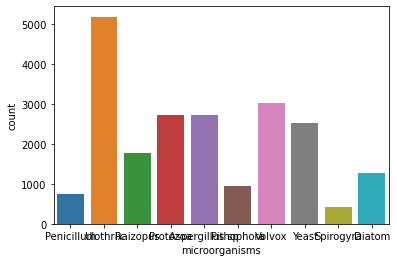

In [349]:
sns.countplot(x='microorganisms',data= mic_data )
plt.show()

It is always interesting to know the basic statistical characteristics of each numerical variables.

# Pre-Processing and Data Wrangling :
#### One hot encoding : To make all variables numeric to feed to machine learning process further
#### Impute Categorical Variables with mode of the variable 

#### View data type categorical

In [350]:
dtype=(mic_data.dtypes=='object')
object_col=list(dtype[dtype].index)
object_col

['microorganisms']

### Data Visulation
Our brains are good at spotting patterns in pictures. Let's View around different types of data visualizations.

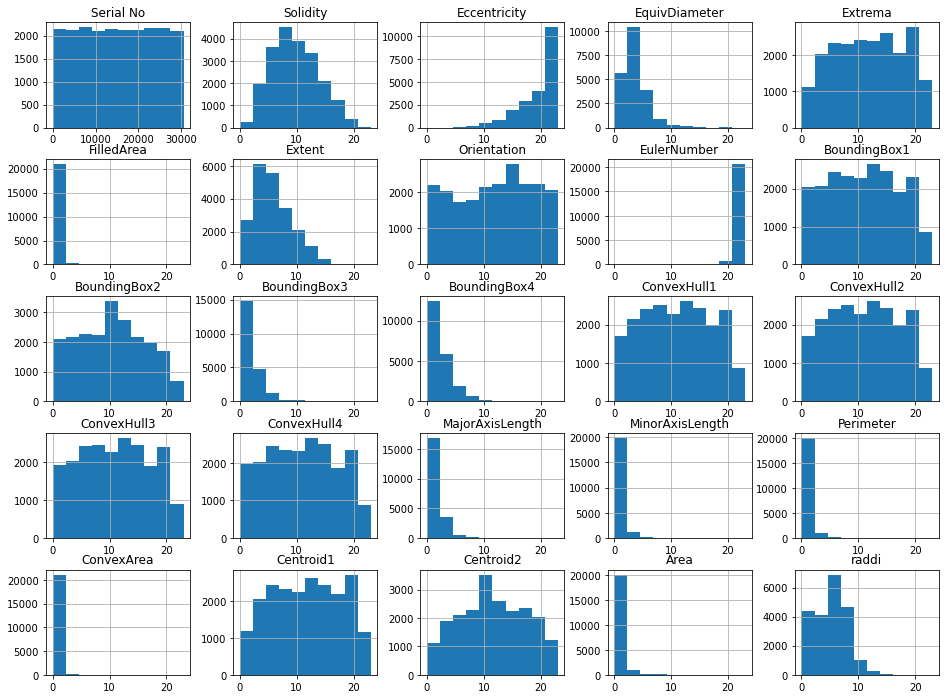

In [351]:
mic_data.hist(bins=10,figsize=(16,12))
plt.show()

# Building ML Model
#### Now we are finally ready, and we can train the model.

#### First, we need to import our model - A decision tree classifier (again, using the sklearn library).

#### Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

###  first : Omit irrelevant columns
##### Let us only take the columns we find relevant. ID columns are never relevant (or at least should not be, if the data was sampled randomly). As our model is very simple, let us also omit the Ticket number, Cabin, ID and Name although more sophisticated models can definitely take advantage of them

## second: Separating input variables (X) and target variable (y)

In [362]:
x = mic_data.drop(['microorganisms'], axis = 1)
y = mic_data['microorganisms']

## Train and Test Split
#### We have our training data, and we have our test data. but in order to evaluate our model we need to split the training dataset into a train dataset and a test dataset. The test data would be used to evaluate the model, while the training data would be used to train the data.

#### To do that, we can use the function "train_test_split" from the sklearn module. the sklean module is probably the most commonly used library in most simple machine learning tasks (this does not include deep learning where other libraries can be more popular)

In [363]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

### Building ML Model
Now we are finally ready, and we can train the model.

First, we need to import our model - A decision tree classifier (again, using the sklearn library).

Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

In [364]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()

In [365]:
model1.fit(x_train,y_train)

DecisionTreeClassifier()

### Evaluate the model
##### Now we have a model. Let's evaulate it with using the accuracy_score function. This output of the function is the number of right answers (passengers survival/death was predicted correctly) divided by the total number of passengers

In [366]:
y_pred=model1.predict(x_test)

In [367]:
y_test.values

array(['Ulothrix', 'Protozoa', 'Yeast', ..., 'Raizopus', 'Diatom',
       'Ulothrix'], dtype=object)

In [368]:
y_pred

array(['Ulothrix', 'Protozoa', 'Yeast', ..., 'Raizopus', 'Diatom',
       'Ulothrix'], dtype=object)

In [369]:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, model1.predict(x_train)))
print('Test accuracy', accuracy_score(y_test,model1.predict(x_test)))

Training accuracy... 1.0
Test accuracy 0.9995320542817033


In [370]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 790,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  384,    0,    0,    2,    0,    0,    0,    0,    0],
       [   0,    0,  236,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  289,    0,    0,    0,    0,    0,    0],
       [   1,    0,    0,    0,  811,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  556,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  129,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1549,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  923,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  741]],
      dtype=int64)

In [330]:
target = model1.predict(test_data)

 ## Execute this model of test_data

In [332]:
res = pd.DataFrame(target)
df = pd.DataFrame(target, columns=['microorganisms'])
df.to_csv('e:class_microorganisms.csv',index=False)

### Thank you Dphi